In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.reset_index()

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
#Finding the Mean of Sales values
data.Sales.mean()

7.496325

In [7]:
data['sales']='<=7.5'
data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,<=7.5
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,<=7.5
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,<=7.5
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.5
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,<=7.5
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,<=7.5
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,<=7.5
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,<=7.5
8,6.54,132,110,0,108,124,Medium,76,10,No,No,<=7.5
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,<=7.5


In [8]:
data.loc[data['Sales']>=7.5,'sales']='High Sales'
data.loc[data['Sales']<=7.5,'sales']='Low Sales'

In [9]:
data=data.drop(['Sales'],axis=1)

In [10]:
data.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [11]:
colnames=list(data.columns)

In [12]:
preds=colnames[:10]
target=colnames[10]

In [13]:
# Categorizing based on Income as "Good" & "Risky"
pd.set_option('display.max_rows',None)
label_encoder=preprocessing.LabelEncoder()
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['US']=label_encoder.fit_transform(data['US'])
data['sales']=label_encoder.fit_transform(data['sales'])
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
5,124,113,13,501,72,0,78,16,0,1,0
6,115,105,0,45,108,2,71,15,1,0,1
7,136,81,15,425,120,1,67,10,1,1,0
8,132,110,0,108,124,2,76,10,0,0,1
9,132,113,0,131,124,2,76,17,0,1,1


In [14]:
x=data.iloc[:,0:10]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
5,124,113,13,501,72,0,78,16,0,1
6,115,105,0,45,108,2,71,15,1,0
7,136,81,15,425,120,1,67,10,1,1
8,132,110,0,108,124,2,76,10,0,0
9,132,113,0,131,124,2,76,17,0,1


In [15]:
y=data.iloc[:,10]
y

0      0
1      0
2      0
3      1
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     1
21     0
22     1
23     1
24     0
25     0
26     0
27     1
28     1
29     0
30     0
31     0
32     1
33     0
34     1
35     0
36     0
37     1
38     1
39     1
40     1
41     0
42     0
43     1
44     1
45     1
46     0
47     1
48     1
49     0
50     1
51     1
52     0
53     1
54     1
55     1
56     0
57     1
58     1
59     1
60     0
61     1
62     1
63     0
64     0
65     1
66     0
67     0
68     0
69     0
70     0
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     1
79     0
80     0
81     0
82     0
83     1
84     1
85     0
86     0
87     0
88     1
89     0
90     1
91     1
92     1
93     0
94     0
95     1
96     0
97     1
98     0
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    1
109    0
110    0
1

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
# Creating model
model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.4, 190.26, 'X[4] <= 131.5\nentropy = 0.999\nsamples = 280\nvalue = [134, 146]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\nentropy = 0.986\nsamples = 216\nvalue = [123, 93]'),
 Text(41.85, 81.53999999999999, 'X[4] <= 93.0\nentropy = 0.811\nsamples = 56\nvalue = [14, 42]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.624\nsamples = 45\nvalue = [7, 38]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 1.5\nentropy = 0.903\nsamples = 160\nvalue = [109, 51]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.276\nsamples = 42\nvalue = [40, 2]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.979\nsamples = 118\nvalue = [69, 49]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 147.5\nentropy = 0.662\nsamples = 64\nvalue = [11, 53]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 23.0\nentropy = 0.391\nsamples = 52\nvalue = [4, 48]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.2

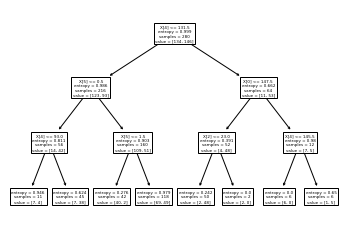

In [19]:
tree.plot_tree(model)

[Text(465.0, 792.75, 'Price <= 131.5\nentropy = 0.999\nsamples = 280\nvalue = [134, 146]'),
 Text(232.5, 566.25, 'ShelveLoc <= 0.5\nentropy = 0.986\nsamples = 216\nvalue = [123, 93]'),
 Text(116.25, 339.75, 'Price <= 93.0\nentropy = 0.811\nsamples = 56\nvalue = [14, 42]'),
 Text(58.125, 113.25, 'entropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(174.375, 113.25, 'entropy = 0.624\nsamples = 45\nvalue = [7, 38]'),
 Text(348.75, 339.75, 'ShelveLoc <= 1.5\nentropy = 0.903\nsamples = 160\nvalue = [109, 51]'),
 Text(290.625, 113.25, 'entropy = 0.276\nsamples = 42\nvalue = [40, 2]'),
 Text(406.875, 113.25, 'entropy = 0.979\nsamples = 118\nvalue = [69, 49]'),
 Text(697.5, 566.25, 'CompPrice <= 147.5\nentropy = 0.662\nsamples = 64\nvalue = [11, 53]'),
 Text(581.25, 339.75, 'Advertising <= 23.0\nentropy = 0.391\nsamples = 52\nvalue = [4, 48]'),
 Text(523.125, 113.25, 'entropy = 0.242\nsamples = 50\nvalue = [2, 48]'),
 Text(639.375, 113.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text

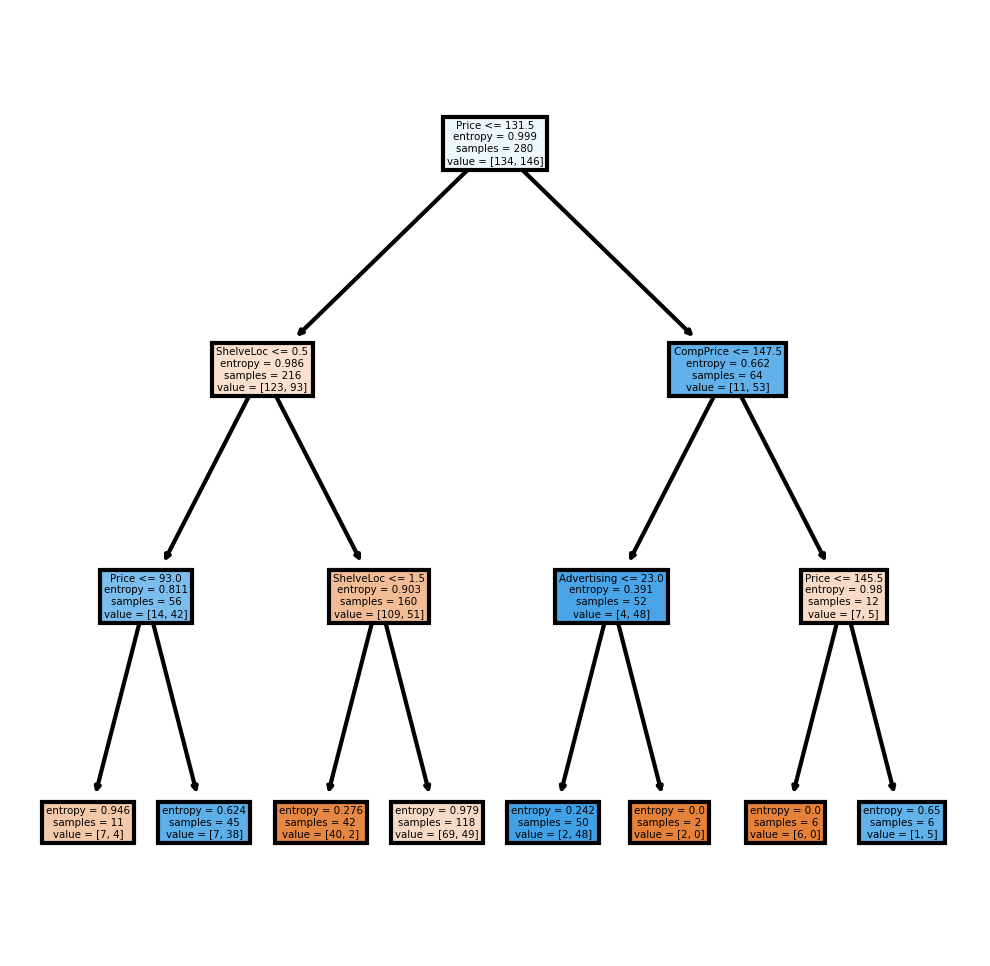

In [20]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,filled=True)

In [21]:
preds=model.predict(x_test)
preds

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [22]:
pd.crosstab(y_test,preds)

col_0,0,1
sales,,
0,53,11
1,28,28


In [23]:
np.mean(preds==y_test)

0.675